# 1. *Regresión*

In [2]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Datos de ejemplo (características y precios)
habitaciones = np.array([1, 2, 3, 4, 5])  # Número de habitaciones
metros_cuadrados = np.array([50, 60, 70, 80, 90])  # Número de metros cuadrados
ubicacion = np.array(["Centro", "Norte", "Sur", "Este", "Oeste"])
barrio = np.array(["El Poblado", "Laureles", "Sabaneta", "Belén", "Robledo"])
y = np.array([900, 650, 550, 500, 250,])  # Precios

# Codificar variables categóricas
encoder_ubicacion = OneHotEncoder(handle_unknown='ignore')
ubicacion_encoded = encoder_ubicacion.fit_transform(ubicacion[:, np.newaxis])

encoder_barrio = OneHotEncoder(handle_unknown='ignore')
barrio_encoded = encoder_barrio.fit_transform(barrio[:, np.newaxis])

# Combinar las características en una matriz de características (X)
X_categorical = np.hstack((ubicacion_encoded.toarray(), barrio_encoded.toarray()))
X_numerical = np.column_stack((habitaciones, metros_cuadrados))
X = np.hstack((X_categorical, X_numerical))

# Calcular las medias de X y y
media_X = np.mean(X, axis=0)
media_y = np.mean(y)

# Calcular los coeficientes beta_1 y beta_0
beta_1 = np.sum((X - media_X) * (y - media_y)[:, np.newaxis], axis=0) / np.sum((X - media_X)**2, axis=0)
beta_0 = media_y - np.sum(beta_1 * media_X)

# Solicitar al usuario las características para hacer una predicción
try:
    nueva_ubicacion = input("Ingrese la ubicación de la casa (Centro, Norte, Sur, Este, Oeste): ")
    nuevo_barrio = input("Ingrese el barrio de la casa (El Poblado, Laureles, Sabaneta, Belén, Robledo): ")
    nueva_habitaciones = int(input("Ingrese el número de habitaciones: "))
    nuevos_metros_cuadrados = float(input("Ingrese el número de metros cuadrados: "))
except ValueError:
    print("Error: Por favor ingrese valores válidos.")

# Codificar las características ingresadas por el usuario
nueva_ubicacion_encoded = encoder_ubicacion.transform(np.array([[nueva_ubicacion]]))
nuevo_barrio_encoded = encoder_barrio.transform(np.array([[nuevo_barrio]]))

# Crear un nuevo arreglo de características con las características ingresadas por el usuario
nuevas_caracteristicas_categorical = np.hstack((nueva_ubicacion_encoded.toarray(), nuevo_barrio_encoded.toarray()))
nuevas_caracteristicas_numerical = np.array([[nueva_habitaciones, nuevos_metros_cuadrados]]) 
nuevas_caracteristicas = np.hstack((nuevas_caracteristicas_categorical, nuevas_caracteristicas_numerical))

# Calcular el precio predicho para la nueva casa
precio_predicho = beta_0 + np.dot(nuevas_caracteristicas, beta_1) 

print(f"Precio predicho para una casa en {nueva_ubicacion}, {nuevo_barrio} con {nueva_habitaciones} habitaciones y {nuevos_metros_cuadrados} metros cuadrados: ${precio_predicho[0]:.2f}")


# Convertir nueva_habitaciones a un array de una dimensión
nueva_habitaciones = np.array([nueva_habitaciones])

# Crear un nuevo arreglo de características para la grilla de valores
nuevas_caracteristicas_categorical_grid = np.tile(nuevas_caracteristicas_categorical, (len(nueva_habitaciones), 1))
nuevas_caracteristicas_numerical_grid = np.column_stack((np.full_like(nueva_habitaciones, nueva_habitaciones), np.full_like(nueva_habitaciones, nuevos_metros_cuadrados)))
X_values = np.hstack((nuevas_caracteristicas_categorical_grid, nuevas_caracteristicas_numerical_grid))

# Calcular los valores predichos para la grilla de valores
y_values = beta_0 + np.dot(X_values, beta_1)

Ingrese la ubicación de la casa (Centro, Norte, Sur, Este, Oeste): este
Ingrese el barrio de la casa (El Poblado, Laureles, Sabaneta, Belén, Robledo): el poblado
Ingrese el número de habitaciones: 3
Ingrese el número de metros cuadrados: 80
Precio predicho para una casa en este, el poblado con 3 habitaciones y 80.0 metros cuadrados: $425.00


1. Se importan las bibliotecas necesarias para el análisis de datos y la creación del modelo de regresión lineal:
    - 'numpy': Biblioteca para operaciones numéricas en Python
    - 'OneHotEncoder' de 'Sklearn.preprocessing': Que se utiliza para variables en una representación numérica.

2. Se definen datos de ejemplo que consisten en las características de las casas (habitaciones, metros, ubicación y barrio) y los precios correspondientes.

3. Las variables categóricas ('ubicacion' y 'barrio') se codifican usando el 'OneHotEncoder' de Scikit-learn.

4. Se combinan las características codificadas y numéricas en una sola matriz de características 'X'.

5. Se calculan los coeficientes de la regresión lineal utilizando el método de mínimos cuadrados

6. El usuario proporciona las características de una nueva casa (ubicación, barrio, cantidad de habitaciones y metros) y se utiliza el modelo de regresión lineal para predecir el precio de esa casa

7. Se muestra el precio predicho para la nueva casa

8. Además, se calculan los valores predichos para una grilla de valores (en este caso, solo se varian las habitaciones, mientras que los metros se mantienen constantes ingresados por el usuario). Esto es útil para visualizar cómo cambian los precios con diferentes números de habitaciones

9. Los resultados se almacenan en 'y_values' y pueden ser utilizados para visualizar como varia el precio en función del número de habitaciones

# 2. *Descenso del Gradiente*

Ingrese el número de puntos de datos: 3
Ingrese los valores de X:
X[1]: 1
X[2]: 5
X[3]: 9
Ingrese los valores de y correspondientes:
y[1]: 56
y[2]: 34
y[3]: 89
Iteración: 0, m = 3.4274, b = 0.5972, Error: 1046.46149202
Iteración: 50, m = 8.7133, b = 6.5812, Error: 322.27947801
Iteración: 100, m = 8.0866, b = 11.0144, Error: 282.17582744
Iteración: 150, m = 7.5456, b = 14.8420, Error: 252.27811300
Iteración: 200, m = 7.0784, b = 18.1470, Error: 229.98903668
Iteración: 250, m = 6.6751, b = 21.0006, Error: 213.37228411
Iteración: 300, m = 6.3268, b = 23.4645, Error: 200.98431154
Iteración: 350, m = 6.0261, b = 25.5918, Error: 191.74894117
Iteración: 400, m = 5.7665, b = 27.4287, Error: 184.86387056
Iteración: 450, m = 5.5423, b = 29.0147, Error: 179.73097438


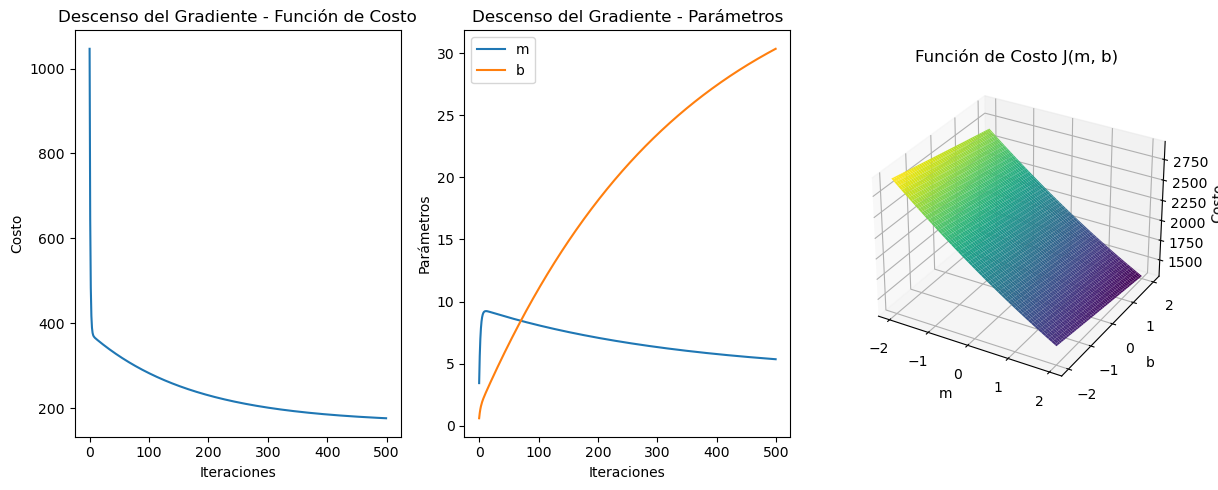

Parámetros finales de la regresión: m = 5.3523, b = 30.3586


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Función de costo en 3D

n = int(input("Ingrese el número de puntos de datos: "))
X = []
y = []

print("Ingrese los valores de X:")
for i in range(n):
    x_value = float(input(f"X[{i + 1}]: "))
    X.append(x_value)

print("Ingrese los valores de y correspondientes:")
for i in range(n):
    y_value = float(input(f"y[{i + 1}]: "))
    y.append(y_value)

def funcion_costo(m, b, X, y):
    n = len(X)
    y_pred = m * np.array(X) + b
    return (1 / (2 * n)) * np.sum((y_pred - y) ** 2)

def descenso_gradiente(X, y, tasa_aprendizaje=0.01, n_iteraciones=3000):
    m = np.random.rand() * 0.01
    b = np.random.rand() * 0.01

    historial_costos = []
    historial_m = []
    historial_b = []

    for iteracion in range(n_iteraciones):
        m_grad = 0
        b_grad = 0
        n = float(len(X))

        for i in range(len(X)):
            m_grad += -(1 / n) * X[i] * (y[i] - (m * X[i] + b))
            b_grad += -(1 / n) * (y[i] - (m * X[i] + b))

        m -= tasa_aprendizaje * m_grad
        b -= tasa_aprendizaje * b_grad

        costo = funcion_costo(m, b, X, y)
        historial_costos.append(costo)
        historial_m.append(m)
        historial_b.append(b)

        if iteracion % 50 == 0:
            print(f"Iteración: {iteracion}, m = {m:.4f}, b = {b:.4f}, Error: {costo:.8f}")

    return m, b, historial_costos, historial_m, historial_b

tasa_aprendizaje = 0.01
n_iteraciones = 500
m_final, b_final, historial_costos, historial_m, historial_b = descenso_gradiente(X, y, tasa_aprendizaje, n_iteraciones)

# Gráfico de la función de costo en función de las iteraciones
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(range(n_iteraciones), historial_costos)
plt.title('Descenso del Gradiente - Función de Costo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

# Gráfico de cómo cambian los parámetros m y b
plt.subplot(1, 3, 2)
plt.plot(range(n_iteraciones), historial_m, label='m')
plt.plot(range(n_iteraciones), historial_b, label='b')
plt.title('Descenso del Gradiente - Parámetros')
plt.xlabel('Iteraciones')
plt.ylabel('Parámetros')
plt.legend()

# Definir los valores de m y b para el gráfico en 3D
m_vals = np.linspace(-2, 2, 100)
b_vals = np.linspace(-2, 2, 100)
M, B = np.meshgrid(m_vals, b_vals)
J_vals = np.array([funcion_costo(m, b, X, y) for m, b in zip(np.ravel(M), np.ravel(B))])
J_vals = J_vals.reshape(M.shape)

# Graficar la función de costo en 3D
ax = plt.subplot(1, 3, 3, projection='3d')
ax.plot_surface(M, B, J_vals, cmap='viridis')
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('Costo')
ax.set_title('Función de Costo J(m, b)')

plt.tight_layout()
plt.show()

print(f"Parámetros finales de la regresión: m = {m_final:.4f}, b = {b_final:.4f}")


1. Se importan las bibliotecas numpy y matplotlib

2. El usuario ingresa el número de puntos de datos ('n') y luego proporciona los valores de las características ('X') y las etiqueta ('y') correspondientes.

3. Se define la función 'funcion_costo()' que calcula el error cuadrático medio entre las predicciones y las etiquetas reales

4. La función 'descenso_gradiente()' implementa el algoritmo de descenso del gradiente para encontrar los parámetros ('m' y 'b') que minimizan la función de costo. Se utiliza un bucle para actualizar iterativamente los parámetros en la dirección opuesta al gradiente

     - El algoritmo comienza con valores aleatorios, para los parámetros del modelo, en este caso 'm' y 'b'. Luego, iterativamente, se actualizan los parámetros en la dirección opuesta al gradiente de la función de costo con respecto a los parámetros. Para minimizar la función de costo, avanzamos en la dirección opuesta al gradiente.
     - En cada iteración del algoritmos, se calcula el gradiente de la función de costo con respecto a los parámetros 'm' y 'b'. Esto se hace con el algoritmo de backpropagation o derivadas parciales de la función de costo con respecto a los parámetros.
     - 'tasa_aprendizaje' es un hiperparámetro que determina que tan grandes son los pasos que damos en la dirección del gradiente. Un valor demasiado pequeño puede hacer que el algoritmo converja lentamente, mientras que un valor demasiado grande puede hacer que el algoritmo diverja

5. - *Función de Costo vs Iteraciones:* Se traza cómo cambia la función de costo a lo largo de las iteraciones del descenso del gradiente
    - *Parámetros vs Iteraciones:* Se muestra como se cambian los parámetros 'm' y 'b' a o largo del proceso de optimización.
    - *Función de costo en 3D:* Se visuzaliza la función de costo en un espacio tridimensional con 'm' y 'b' como ejes

6. Se muestran los parámetros finales de la regresión lineal ('m' y 'b') después de aplicar el descenso del gradiente

# 3. *Clasificación*

C:\Users\jeanc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jeanc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Exactitud: 0.9250814332247557
Precisión: 0.9234828496042217
Sensibilidad: 0.8974358974358975
Puntuación F1: 0.9102730819245773


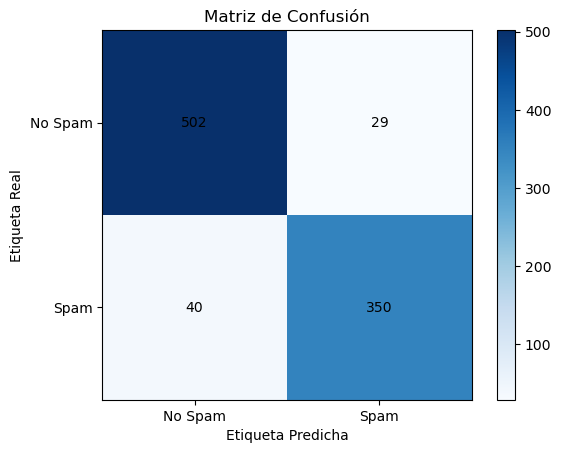

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from ucimlrepo import fetch_ucirepo

# Obtener el conjunto de datos
spambase = fetch_ucirepo(id=94)

# Extraer características y etiquetas
X = spambase.data.features
y = spambase.data.targets

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_logistico.predict(X_test)

# Calcular métricas de evaluación
precision = precision_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred)
puntuacion_f1 = f1_score(y_test, y_pred)
exactitud = accuracy_score(y_test, y_pred)

# Generar matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Imprimir métricas de evaluación
print("Exactitud:", exactitud)
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Puntuación F1:", puntuacion_f1)

# Graficar la matriz de confusión
plt.imshow(matriz_confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.xticks([0, 1], ['No Spam', 'Spam'])
plt.yticks([0, 1], ['No Spam', 'Spam'])
for i in range(matriz_confusion.shape[0]):
    for j in range(matriz_confusion.shape[1]):
        plt.text(j, i, str(matriz_confusion[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()


1. Se importan las bibliotecas necesarias para cargar el conjunto de datos, dividir los datos, entrenar el modelo, calcular métricas de evaluación y visualizar la matriz de confusión.

2. El conjunto de datos "Spambase" se obtiene usando la función 'fetch_ucirepo()' del módulo 'ucimlrepo'. Este conjunto de datos contiene características de correos electrónicos y etiquetas que indican si son spam o no.

3. Los datos se dividen en conjuntos de entrenamiento y prueba utilizando la función 'train_test_split()' de 'sklearn.model_selection()'

4. Se crea una instancia de 'LogisticRegression()' y se entrena el modelo utilizando los datos de entrenamiento

5. Se realizan predicciones en el conjunto de prueba y se calculan varias métricas de evaluación, incluyendo precisión, sensibilidad, puntuación F1 y exactitud, utilizando funciones 'seklearn.metrics'

6. Se genera una matriz de confusión utilizando la función 'confusion_matrix()' de 'sklearn.metrics'. Esta matriz muestra la cantidad de predicciones correctas e incorrectas hechas por el modelo.

7. Se utiliza 'matplotlib' para visualizar la matriz de confusión como una imagen. Los valores en la matriz se muestran como texto en cada celda.

8. Se imprimen las métricas de evaluación (exactitud, precisión, sensibilidad y puntuación F1) y se muestra la matriz de confusión. Estos resultados proporcionan una evaluación completa del rendimiento del modelo de regresión logiística en la clasificación de correctos electrónicos como 'spam' o 'no spam'